In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/train.csv')

In [95]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
train_df.shape

(891, 12)

In [99]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [100]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
px.histogram(train_df, x='Sex', title='Sex vs. Survival', color='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

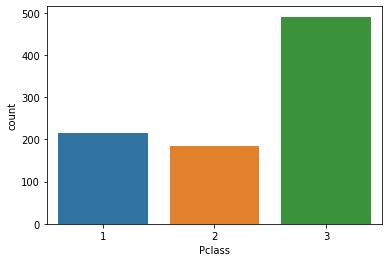

In [102]:
train_df['Pclass'].value_counts()
sns.countplot(data = train_df,x = 'Pclass')

In [103]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [104]:
fig = px.histogram(train_df, 
                   x='SibSp', 
                    color='Survived', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='sibsp vs survival')
fig.update_layout(bargap=0.1)
fig.show()

In [105]:
img = px.histogram(train_df, x='Fare', title='Fare vs. Survival', color='Survived',nbins = 50)
img.update_layout(bargap = 0.1)
img.show()

In [106]:
fig = px.histogram(train_df, 
                   x='Age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age',
                  color = 'Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [107]:
title = set()
for name in train_df['Name']:
    title.add(name.split(',')[1].split('.')[0].strip())
print(title)
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

{'Major', 'Sir', 'Mlle', 'Master', 'Mme', 'Col', 'Mrs', 'the Countess', 'Jonkheer', 'Dr', 'Capt', 'Mr', 'Lady', 'Miss', 'Rev', 'Don', 'Ms'}


In [108]:
train_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

train_df['Title'] = train_df.Title.map(Title_Dictionary)


train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [109]:
test_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

test_df['Title'] = test_df.Title.map(Title_Dictionary)


In [110]:
df1 = train_df.drop(['Name','Ticket','Cabin','PassengerId'],axis = 1)


In [111]:
df2 = test_df.drop(['Name','Ticket','Cabin','PassengerId'],axis = 1)


In [112]:
df1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [113]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']
target_col = 'Survived'

In [114]:
print(input_cols)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']


In [115]:
train_inputs = df1[input_cols].copy()
train_targets = df1[target_col].copy()

In [116]:
test_inputs = df2[input_cols].copy()
test_targets = df2[target_col].copy()

In [117]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
train_inputs[categorical_cols].nunique()

Sex         2
Embarked    3
Title       6
dtype: int64

In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imputer = SimpleImputer(strategy = 'median')

In [120]:
imputer.fit(df1[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [121]:
train_inputs[numeric_cols].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [122]:
from sklearn.preprocessing import StandardScaler 

In [123]:
df1.Age = (df1.Age - min(df1.Age))/(max(df1.Age)-min(df1.Age))


In [124]:
df1.Fare = (df1.Fare - min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))


In [135]:
df2.Age = (df2.Age - min(df2.Age))/(max(df2.Age)-min(df2.Age))


In [136]:
df2.Age = (df2.Age - min(df2.Age))/(max(df2.Age)-min(df2.Age))


In [125]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df1[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
modela=DecisionTreeClassifier()
modelb=RandomForestClassifier()
modelc=LogisticRegression()


In [127]:
modela.fit(train_inputs[numeric_cols + encoded_cols], train_targets)



DecisionTreeClassifier()

In [128]:
X_train = train_inputs[numeric_cols + encoded_cols]

X_test = test_inputs[numeric_cols + encoded_cols]

In [137]:
import math
train_preds=modela.predict(X_test)
accuracy_score(test_targets, train_preds)


0.9820426487093153

In [130]:
modela.score(X_train, train_targets)

0.9820426487093153

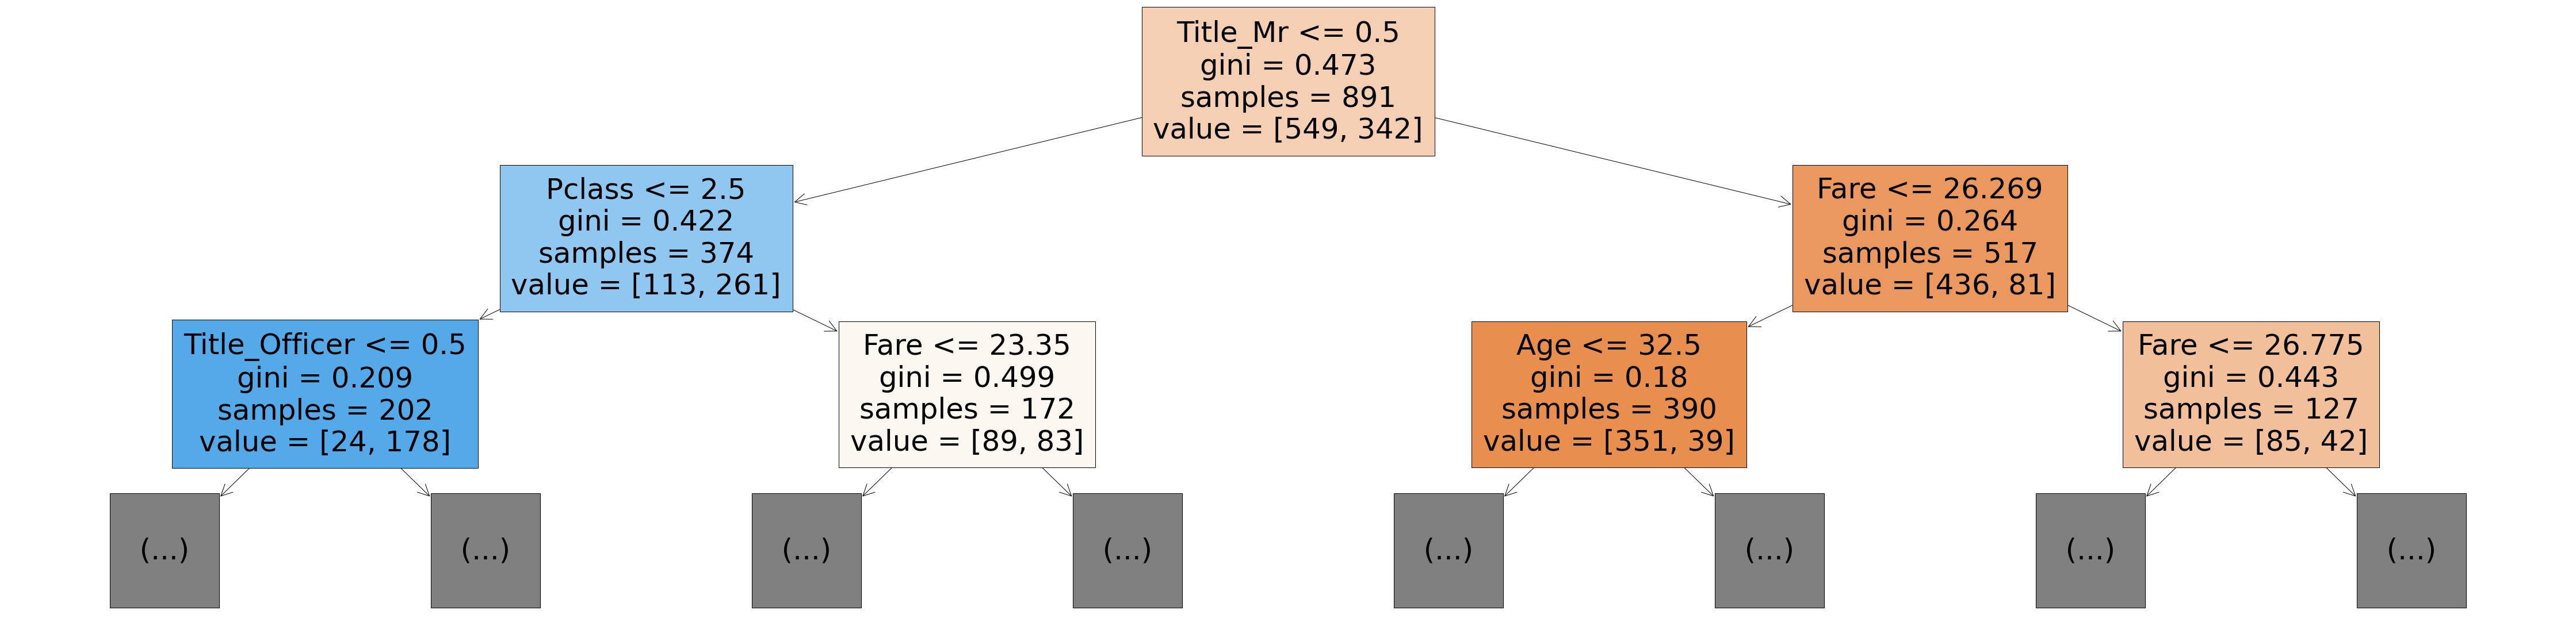

In [131]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(modela, feature_names=X_train.columns, max_depth=2, filled=True);

In [132]:
modela.tree_.max_depth

17

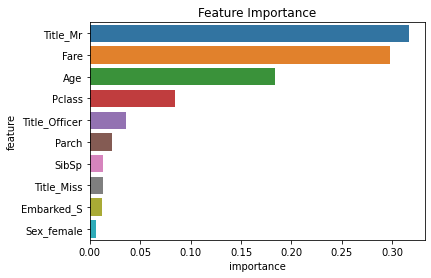

In [133]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modela.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<AxesSubplot:>

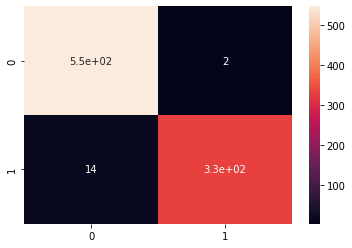

In [139]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_targets, train_preds),annot = True)